In [ ]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/Images/'

In [ ]:
import os
print(os.path)

glasses_dir = os.path.join(path, 'glasses/')
noglass_dir = os.path.join(path, 'no_glasses/')

<module 'posixpath' from '/usr/lib/python3.7/posixpath.py'>


In [ ]:
glass_img = os.listdir(glasses_dir)
print(glass_img[:10])
noglass_img = os.listdir(noglass_dir)
print(noglass_img[:10])

['face-3736.jpg', 'face-3936.jpg', 'face-3729.jpg', 'face-3792.jpg', 'face-3741.jpg', 'face-406.jpg', 'face-3772.jpg', 'face-3938.jpg', 'face-4044.jpg', 'face-4038.jpg']
['face-3295.jpg', 'face-3104.jpg', 'face-3046.jpg', 'face-3086.jpg', 'face-3269.jpg', 'face-3169.jpg', 'face-3055.jpg', 'face-3084.jpg', 'face-319.jpg', 'face-2943.jpg']


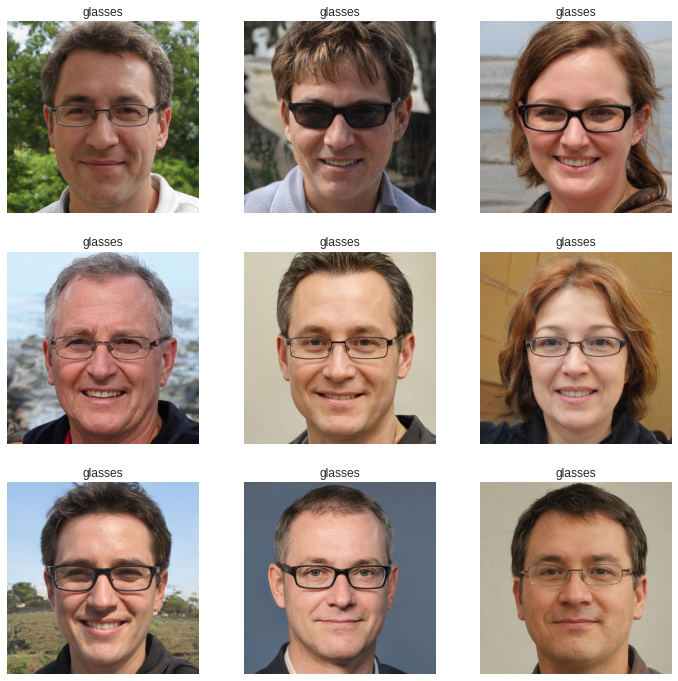

In [ ]:
import random
import matplotlib.image as mpimg
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(glass_img))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    img = mpimg.imread(glasses_dir+glass_img[ran_num[i]])
    plt.imshow(img)
    plt.title("glasses")
    plt.axis("off")

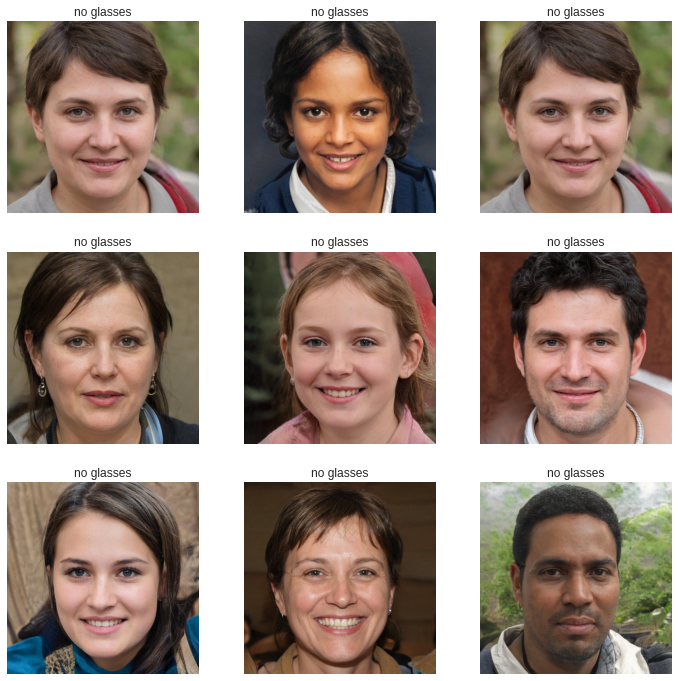

In [ ]:
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(noglass_img))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    img = mpimg.imread(noglass_dir+noglass_img[ran_num[i]])
    plt.imshow(img)
    plt.title("no glasses")
    plt.axis("off")

In [ ]:
print(len(glass_img))
print(len(noglass_img))

2779
2151


In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
train = tf.keras.preprocessing.image_dataset_from_directory(path,validation_split=0.3,subset="training",shuffle=True,seed=42,image_size= (160,160),batch_size=32)

Found 4930 files belonging to 2 classes.
Using 3451 files for training.


In [ ]:
train

<BatchDataset shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
test= tf.keras.preprocessing.image_dataset_from_directory(path,validation_split=0.3,subset="validation",shuffle=True,seed=42,image_size= (160,160),batch_size=32)

Found 4930 files belonging to 2 classes.
Using 1479 files for validation.


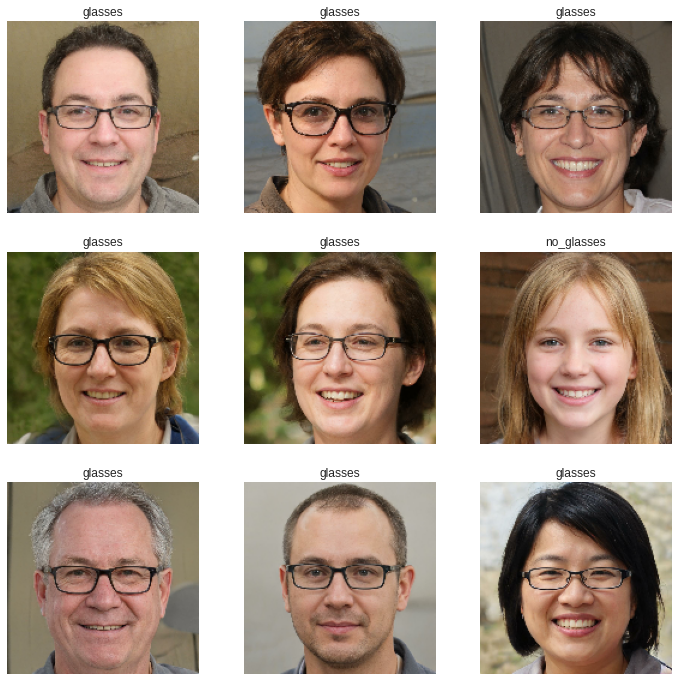

In [ ]:
class_names = train.class_names

plt.figure(figsize=(12, 12))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

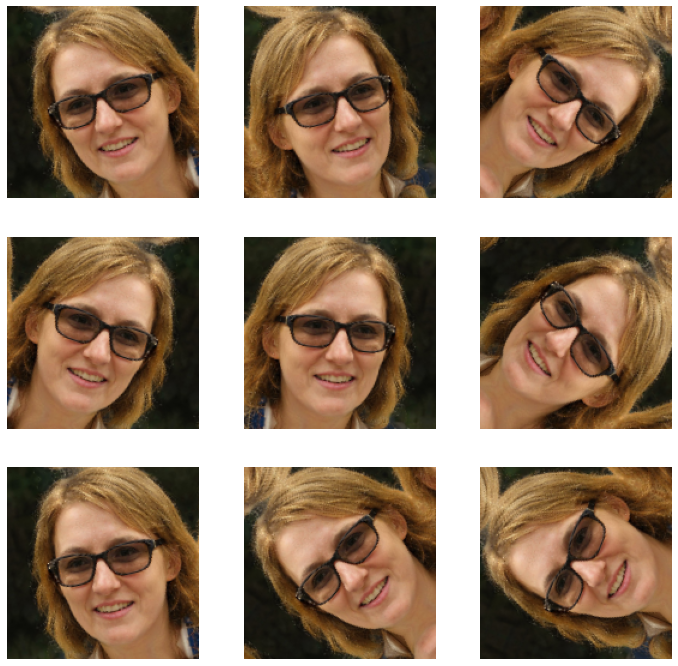

In [ ]:
for image, _ in train.take(1):
    plt.figure(figsize=(12, 12))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
tf.random.set_seed(42)

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), activation='softmax', padding='same', input_shape=(160, 160, 3)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='softmax', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(lr=0.000001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = define_model()

In [ ]:
model.fit(train,validation_data=test, batch_size=128,epochs=20, verbose=1)

Epoch 1/20
108/108 [==============================] - 180s 2s/step - loss: 0.6920 - accuracy: 0.5395 - val_loss: 0.6915 - val_accuracy: 0.7390
Epoch 2/20
108/108 [==============================] - 175s 2s/step - loss: 0.6845 - accuracy: 0.6580 - val_loss: 0.6880 - val_accuracy: 0.6917
Epoch 3/20
108/108 [==============================] - 173s 2s/step - loss: 0.6766 - accuracy: 0.7153 - val_loss: 0.6820 - val_accuracy: 0.7728
Epoch 4/20
108/108 [==============================] - 179s 2s/step - loss: 0.6678 - accuracy: 0.7724 - val_loss: 0.6720 - val_accuracy: 0.8343
Epoch 5/20
108/108 [==============================] - 174s 2s/step - loss: 0.6579 - accuracy: 0.8375 - val_loss: 0.6591 - val_accuracy: 0.8546
Epoch 6/20
108/108 [==============================] - 176s 2s/step - loss: 0.6486 - accuracy: 0.8727 - val_loss: 0.6472 - val_accuracy: 0.8817
Epoch 7/20
108/108 [==============================] - 187s 2s/step - loss: 0.6410 - accuracy: 0.8943 - val_loss: 0.6381 - val_accuracy: 0.9033